In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import joblib

In [73]:
data = pd.read_csv('Financial_inclusion_dataset (2).csv')
data.drop(['uniqueid'], axis=1, inplace=True)
data.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [74]:
data.shape

(23524, 12)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   bank_account            23524 non-null  object
 3   location_type           23524 non-null  object
 4   cellphone_access        23524 non-null  object
 5   household_size          23524 non-null  int64 
 6   age_of_respondent       23524 non-null  int64 
 7   gender_of_respondent    23524 non-null  object
 8   relationship_with_head  23524 non-null  object
 9   marital_status          23524 non-null  object
 10  education_level         23524 non-null  object
 11  job_type                23524 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.2+ MB


In [76]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [77]:
data.isnull().sum()

country                   0
year                      0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [78]:
num = data.select_dtypes(include = ['number'])
cat = data.select_dtypes(exclude = ['number'])

print('Numerical Data')
display(num.head())
print('\nCategorical Data')
display(cat.head())

Numerical Data


,year,household_size,age_of_respondent
0,2018,3,24
1,2018,5,70
2,2018,5,26
3,2018,5,34
4,2018,8,26



Categorical Data


,country,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed


In [79]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder
for i in cat.columns:
  encoder = LabelEncoder()
  data[i] = encoder.fit_transform(data[i])
  joblib.dump(encoder, open(f'{i}_encoder.pkl', 'wb'))
  
data.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,1,0,1,3,24,0,5,2,3,9
1,0,2018,0,0,0,5,70,0,1,4,0,4
2,0,2018,1,1,1,5,26,1,3,3,5,9
3,0,2018,0,0,1,5,34,0,1,2,2,3
4,0,2018,0,1,0,8,26,1,0,3,2,5


In [80]:
sel_col = ['country', 'year', 'bank_account', 'location_type', 'cellphone_access', 'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level', 'job_type']
newData = data[sel_col]
newData.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,1,0,1,3,24,0,5,2,3,9
1,0,2018,0,0,0,5,70,0,1,4,0,4
2,0,2018,1,1,1,5,26,1,3,3,5,9
3,0,2018,0,0,1,5,34,0,1,2,2,3
4,0,2018,0,1,0,8,26,1,0,3,2,5


In [81]:
from sklearn.model_selection import train_test_split
x = newData.drop('bank_account', axis = 1)
y = newData.bank_account

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, stratify = y)
print(f'Xtrain: {xtrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'Ytrain:{ytrain.shape}')
print(f'Ytest: {ytest.shape}')

Xtrain: (18819, 11)
Xtest: (4705, 11)
Ytrain:(18819,)
Ytest: (4705,)


In [82]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(xtrain, ytrain)

LogisticRegression()

In [83]:
from sklearn.metrics import classification_report
prediction = logmodel.predict(xtrain)
print(classification_report(ytrain, prediction))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     16169
           1       0.65      0.19      0.30      2650

    accuracy                           0.87     18819
   macro avg       0.77      0.59      0.61     18819
weighted avg       0.85      0.87      0.84     18819



In [84]:
prediction = logmodel.predict(xtest)
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      4043
           1       0.65      0.18      0.29       662

    accuracy                           0.87      4705
   macro avg       0.77      0.58      0.61      4705
weighted avg       0.85      0.87      0.84      4705



<Axes: xlabel='bank_account', ylabel='count'>

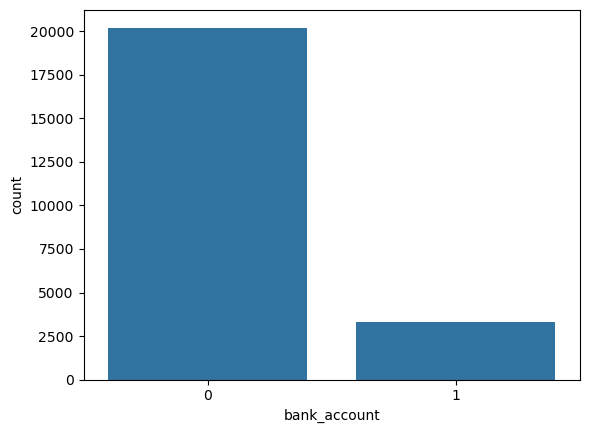

In [85]:
sns.countplot(x = data.bank_account)

<Axes: xlabel='bank_account', ylabel='count'>

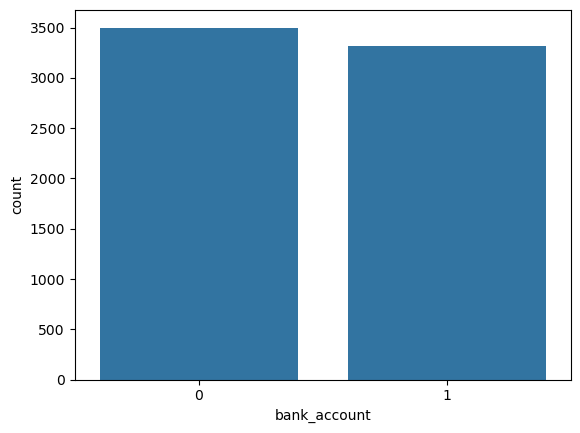

In [86]:
class0 = data.loc[data['bank_account'] == 0]
class1 = data.loc[data['bank_account'] == 1]

class0 = class0.sample(3500)
newData = pd.concat([class0, class1], axis = 0)

sns.countplot(x = newData.bank_account)

In [87]:
x = newData.drop('bank_account', axis = 1)
y = newData.bank_account

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, stratify = y)

In [88]:
newlogmodel = LogisticRegression()
newlogmodel.fit(xtrain, ytrain)

LogisticRegression()

In [89]:
prediction = newlogmodel.predict(xtrain)
print(classification_report(ytrain, prediction))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76      2800
           1       0.75      0.70      0.72      2649

    accuracy                           0.74      5449
   macro avg       0.74      0.74      0.74      5449
weighted avg       0.74      0.74      0.74      5449



In [90]:
joblib.dump(newlogmodel, open('financialmodel.pkl', 'wb'))